In [1]:
import numpy as np 
import pandas as pd

In [2]:
df = pd.read_csv(r"C:\Users\Aparn\OneDrive\Desktop\DATA SCIENCES\Projects/travel insurance.csv")
df

,Agency,Agency Type,Distribution Channel,Product Name,Claim,Duration,Destination,Net Sales,Commision (in value),Gender,Age
0,CBH,Travel Agency,Offline,Comprehensive Plan,No,186,MALAYSIA,-29.0,9.57,F,81
1,CBH,Travel Agency,Offline,Comprehensive Plan,No,186,MALAYSIA,-29.0,9.57,F,71
2,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,No,65,AUSTRALIA,-49.5,29.70,NaN,32
3,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,No,60,AUSTRALIA,-39.6,23.76,NaN,32
4,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,No,79,ITALY,-19.8,11.88,NaN,41
...,...,...,...,...,...,...,...,...,...,...,...
63321,JZI,Airlines,Online,Basic Plan,No,111,JAPAN,35.0,12.25,M,31
63322,JZI,Airlines,Online,Basic Plan,No,58,CHINA,40.0,14.00,F,40
63323,JZI,Airlines,Online,Basic Plan,No,2,MALAYSIA,18.0,6.30,M,57
63324,JZI,Airlines,Online,Basic Plan,No,3,VIET NAM,18.0,6.30,M,63


In [3]:
df.head()

,Agency,Agency Type,Distribution Channel,Product Name,Claim,Duration,Destination,Net Sales,Commision (in value),Gender,Age
0,CBH,Travel Agency,Offline,Comprehensive Plan,No,186,MALAYSIA,-29.0,9.57,F,81
1,CBH,Travel Agency,Offline,Comprehensive Plan,No,186,MALAYSIA,-29.0,9.57,F,71
2,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,No,65,AUSTRALIA,-49.5,29.70,NaN,32
3,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,No,60,AUSTRALIA,-39.6,23.76,NaN,32
4,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,No,79,ITALY,-19.8,11.88,NaN,41


In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings("ignore")

In [5]:
exp=df

In [6]:
df['Claim'] = df['Claim'].replace({'Yes':0,'No':1})

In [7]:
X = df.drop('Claim',axis = 1)
y = df['Claim']

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63326 entries, 0 to 63325
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Agency                63326 non-null  object 
 1   Agency Type           63326 non-null  object 
 2   Distribution Channel  63326 non-null  object 
 3   Product Name          63326 non-null  object 
 4   Claim                 63326 non-null  int64  
 5   Duration              63326 non-null  int64  
 6   Destination           63326 non-null  object 
 7   Net Sales             63326 non-null  float64
 8   Commision (in value)  63326 non-null  float64
 9   Gender                18219 non-null  object 
 10  Age                   63326 non-null  int64  
dtypes: float64(2), int64(3), object(6)
memory usage: 5.3+ MB


In [9]:
df.dropna(inplace = True)
df = df.rename(columns = {'Agency Type':'Agency_Type','Distribution Channel':'Distribution_Channel','Product Name':'Product_Name','Commision (in value)':'Commision'})

# Adding continents based on Destinations

In [10]:
continents = {'MALAYSIA':'Asia','SINGAPORE':'Asia','BRUNEI DARUSSALAM':'Asia','INDONESIA':'Asia','THAILAND':'Asia','CHINA':'Asia','PHILIPPINES':'Asia','HONG KONG':'Asia','VIET NAM':'Asia','CAMBODIA':'Asia','MYANMAR':'Asia','JAPAN':'Asia','TAIWAN, PROVINCE OF CHINA':'Asia','SRI LANKA':'Asia','MACAO':'Asia','KOREA, REPUBLIC OF':'Asia','UNITED ARAB EMIRATES':'Asia','OMAN':'Asia','NEPAL':'Asia','SAUDI ARABIA':'Asia','JORDAN':'Asia','BANGLADESH':'Asia','MONGOLIA':'Asia','AZERBAIJAN':'Asia','PAKISTAN':'Asia','BAHRAIN':'Asia','QATAR':'Asia','ISRAEL':'Asia','TURKMENISTAN':'Asia','BHUTAN':'Asia','IRAN, ISLAMIC REPUBLIC OF':'Asia','UZBEKISTAN':'Asia','RUSSIAN FEDERATION':'Asia','MALDIVES':'Asia','PAPUA NEW GUINEA':'Asia','LEBANON':'Asia',
              'ITALY':'Europe','NORWAY':'Europe','DENMARK':'Europe','POLAND':'Europe','UNITED KINGDOM':'Europe','FRANCE':'Europe','SPAIN':'Europe','CZECH REPUBLIC':'Europe','GERMANY':'Europe','AUSTRIA':'Europe', 'NETHERLANDS':'Europe','CROATIA':'Europe', 'FINLAND':'Europe','GREECE':'Europe', 'BELGIUM':'Europe', 'IRELAND':'Europe', 'SWITZERLAND':'Europe','ICELAND':'Europe','PORTUGAL':'Europe', 'ROMANIA':'Europe','TURKEY':'Europe', 'SWEDEN':'Europe','LUXEMBOURG':'Europe','SERBIA':'Europe','HUNGARY':'Europe','SLOVENIA':'Europe','BULGARIA':'Europe','LITHUANIA':'Europe','UKRAINE':'Europe','MOLDOVA':'Europe','LATVIA':'Europe','MALTA':'Europe','ALBANIA':'Europe', 'MACEDONIA, THE FORMER YUGOSLAV REPUBLIC OF':'Europe','BELARUS':'Europe','REPUBLIC OF MONTENEGRO':'Europe','BOSNIA AND HERZEGOVINA':'Europe',
              'NAMIBIA':'Africa','SOUTH AFRICA':'Africa','TANZANIA':'Africa','TUNISIA':'Africa' ,'ESTONIA':'Africa','ETHIOPIA':'Africa','BENIN':'Africa','UGANDA':'Africa','MOROCCO':'Africa','ETHIOPIA':'Africa','MAURITIUS':'Africa','GHANA':'Africa','BOLIVIA':'Africa','SIERRA LEONE':'Africa','GUINEA':'Africa','GUYANA':'Africa','ZIMBABWE':'Africa','BOTSWANA':'Africa','MALI':'Africa','SEYCHELLES':'Africa','ZAMBIA':'Africa','NIGERIA':'Africa','ANGOLA':'Africa','GUINEA-BISSAU':'Africa','CAMEROON':'Africa','RWANDA':'Africa','SENEGAL':'Africa',
              'UNITED STATES':'North America','CANADA':'North America','BARBADOS':'North America','MEXICO':'North America','JAMAICA':'North America','GUAM':'North America','VIRGIN ISLANDS, U.S.':'North America','PANAMA':'North America','PUERTO RICO':'North America','GUADELOUPE':'North America','BERMUDA':'North America','CAYMAN ISLANDS':'North America', 'DOMINICAN REPUBLIC':'North America', 'TURKS AND CAICOS ISLANDS':'North America','COSTA RICA':'North America',
              'AUSTRALIA':'Ocenia', 'NEW ZEALAND':'Ocenia','FIJI':'Ocenia','NEW CALEDONIA':'Ocenia','SAMOA':'Ocenia','NORTHERN MARIANA ISLANDS':'Ocenia','VANUATU':'Ocenia',
              'PERU':'South America','ARGENTINA':'South America','ECUADOR':'South America','BRAZIL':'South America','URUGUAY':'South America','COLOMBIA':'South America','VENEZUELA':'South America'}
df['Continents']=df['Destination'].map(continents)

In [11]:
df.dropna(inplace= True)

# Most visited Continents

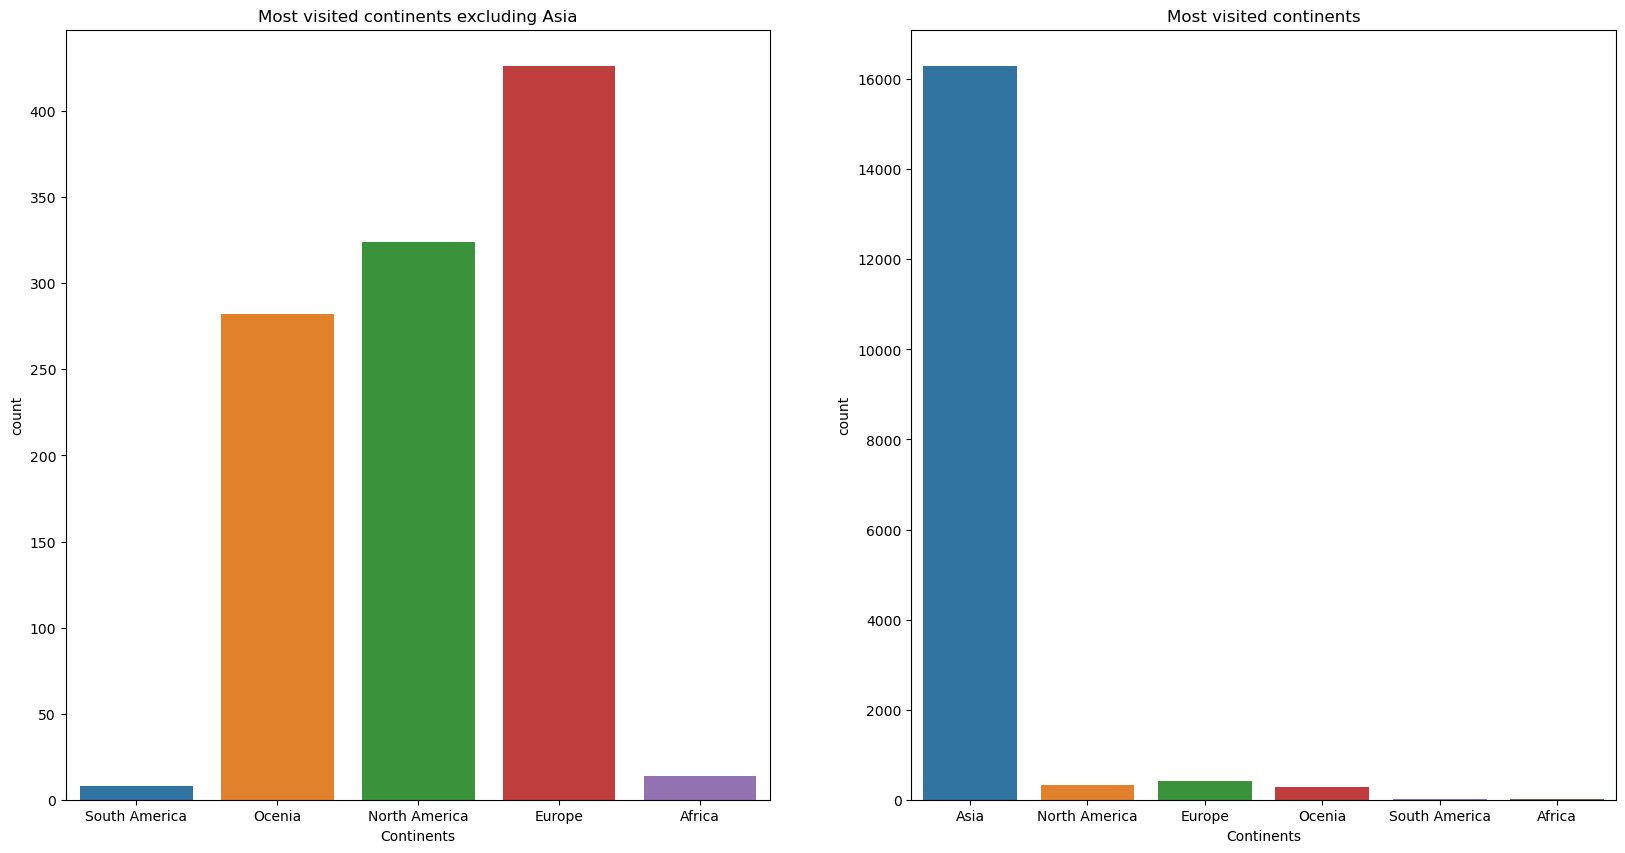

In [12]:
fig,axes = plt.subplots(nrows=1,ncols = 2,figsize=(20,10))

sns.countplot(ax=axes[1],x='Continents',data = df);
sns.countplot(ax=axes[0],x='Continents',data = df[df['Continents']!='Asia'].sort_values(by='Continents',ascending = False));

axes[1].title.set_text('Most visited continents')
axes[0].title.set_text('Most visited continents excluding Asia')

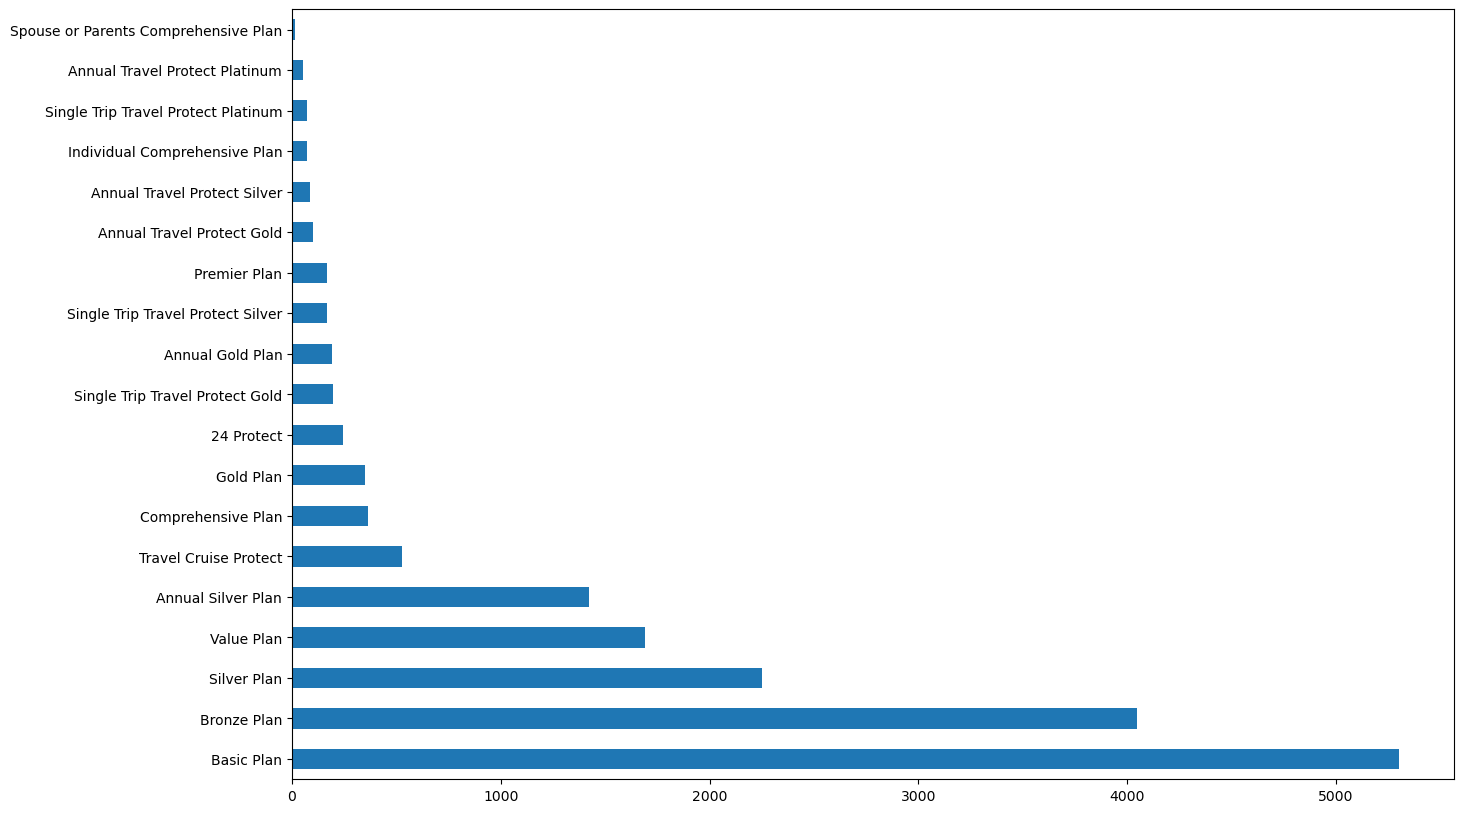

In [13]:
df['Product_Name'].value_counts().head(19).plot(kind = 'barh',figsize=(15,10));

# Destinations with most sales

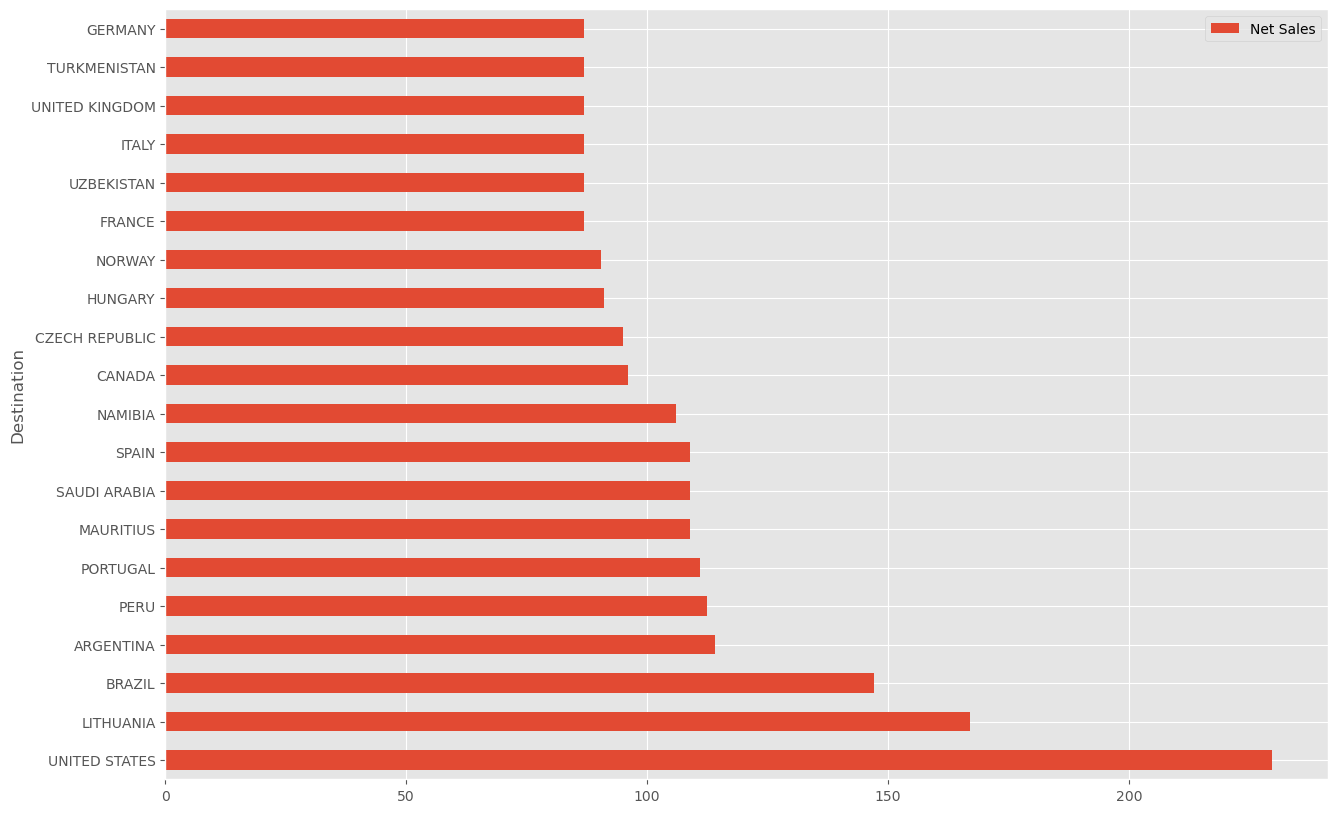

In [14]:
plt.style.use('ggplot')
df[df['Net Sales']>0].groupby(['Destination']).agg({'Net Sales':'median'}).sort_values(by='Net Sales',ascending = False).\
                             head(20).plot(kind ='barh',figsize=(15,10));

# Destinations with Net Sales loss

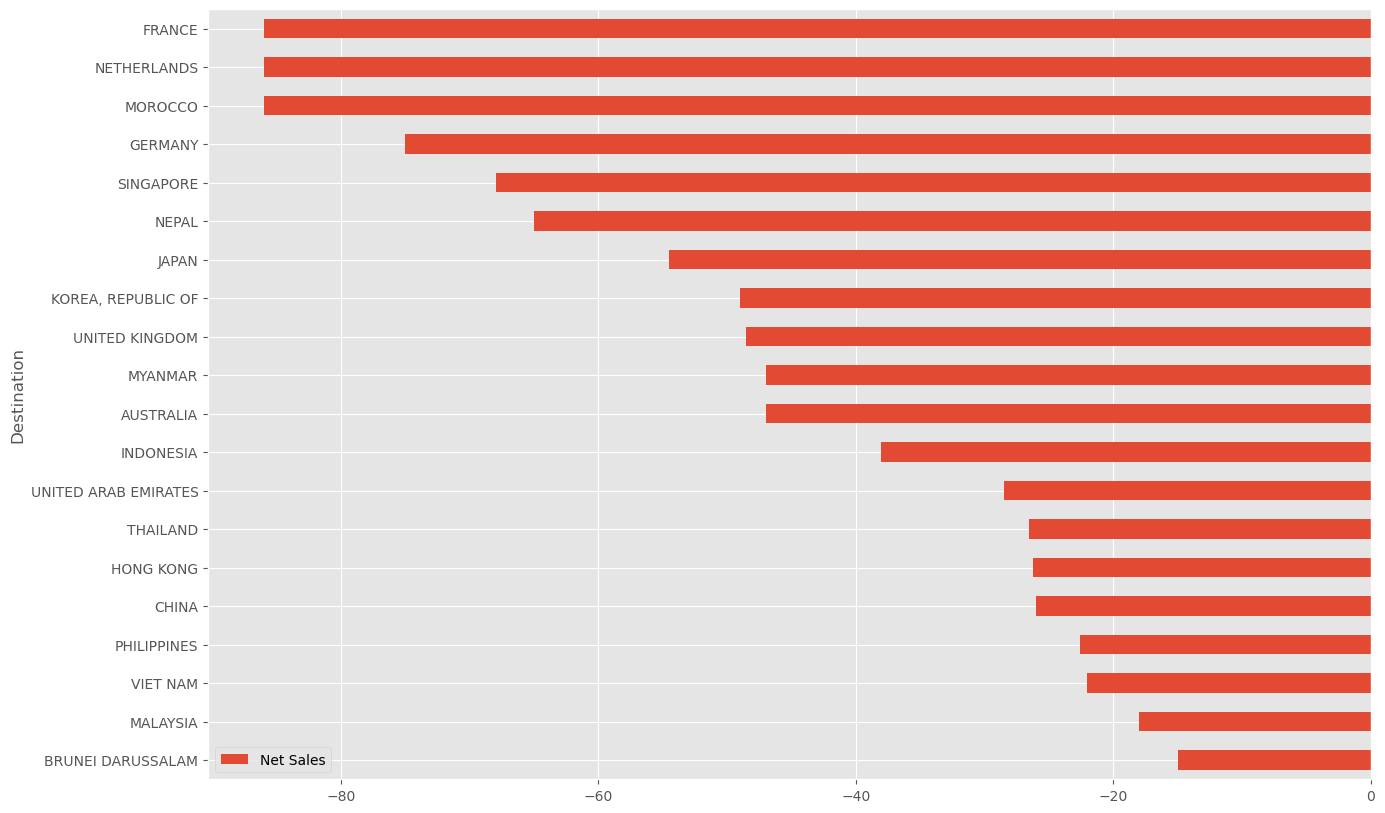

In [15]:
plt.style.use('ggplot')
df[df['Net Sales']<0].groupby(['Destination']).agg({'Net Sales':'median'}).sort_values(by='Net Sales',ascending = False).\
                             head(20).plot(kind ='barh',figsize=(15,10));

# Top commision earnings products

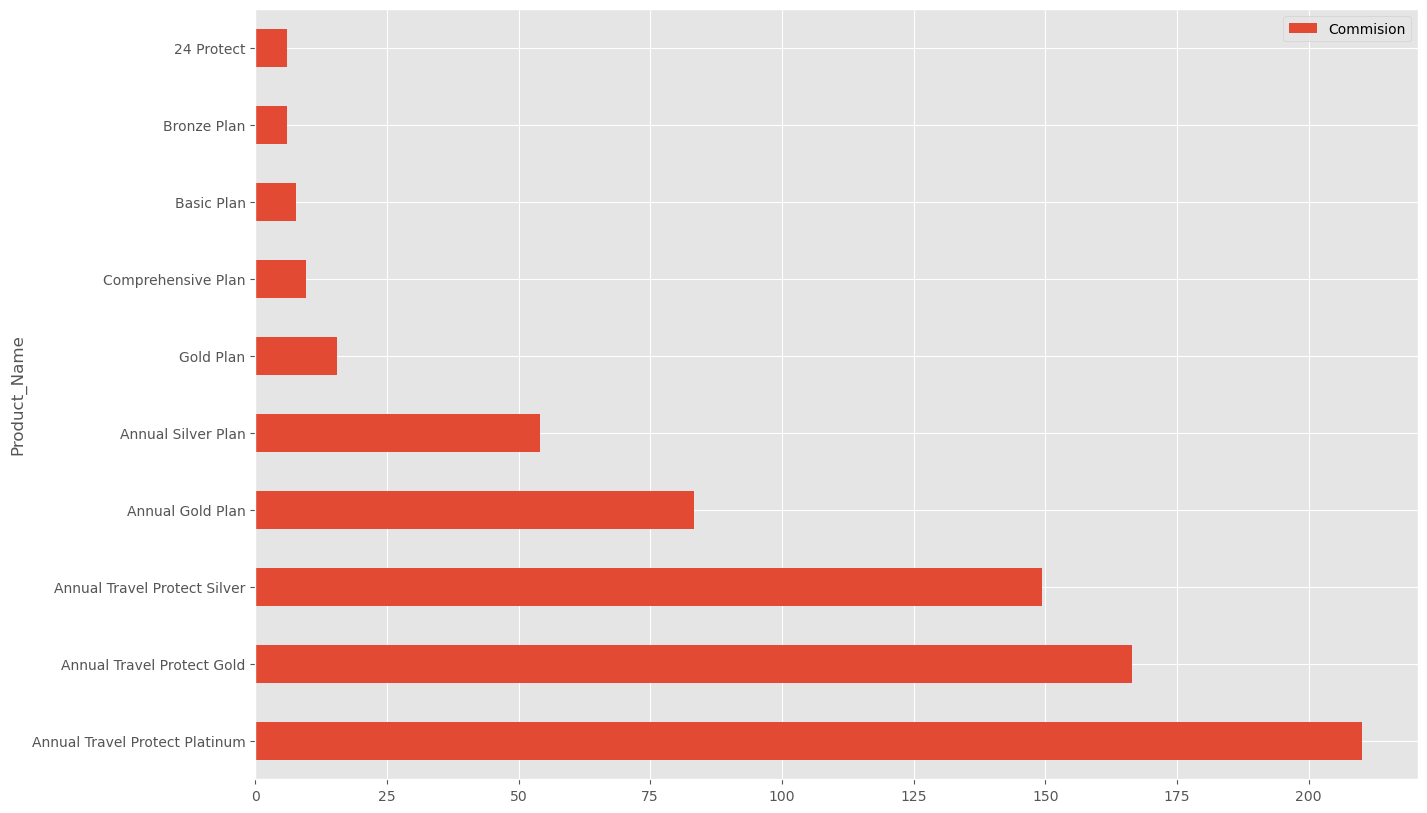

In [16]:
df[df['Commision']>0].groupby(['Product_Name']).agg({'Commision':'median'}).head(10).sort_values(by='Commision',ascending = False).\
                             head(20).plot(kind ='barh',figsize=(15,10));

# Top agency earners

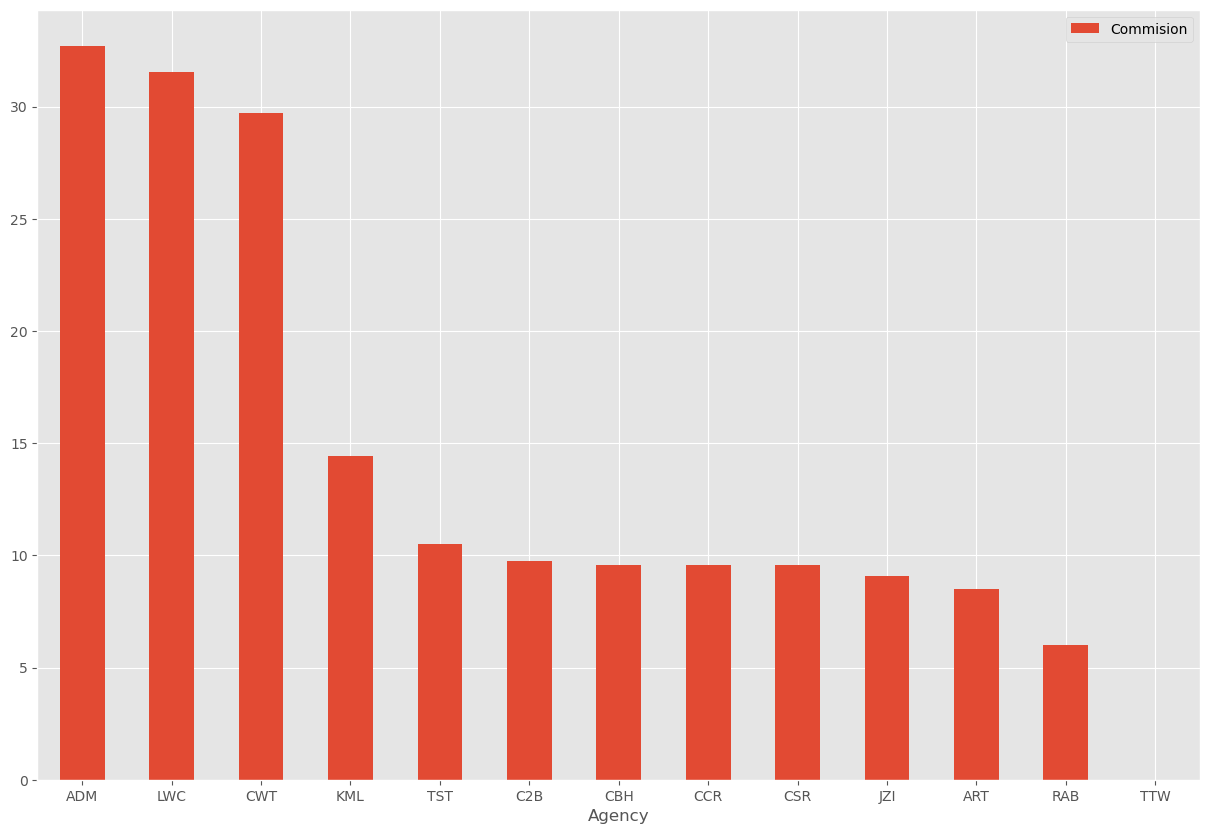

In [17]:
df.groupby('Agency').agg({'Commision':'median'}).sort_values(by='Commision',ascending = False).head(20).plot(kind ='bar',figsize=(15,10),rot=0);

# Insurances with most claims

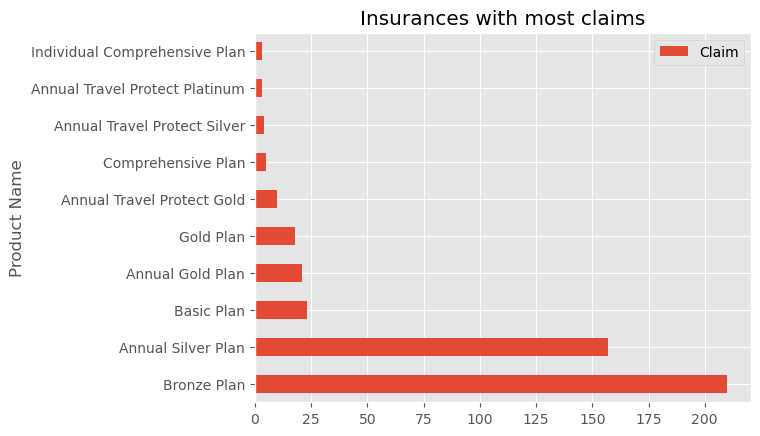

In [18]:
exp[exp['Claim']==0].groupby('Product Name').agg({'Claim':'count'}).head(10).sort_values(by='Claim',ascending = False).plot(kind = 'barh',title = 'Insurances with most claims');

# Insurance claims by age

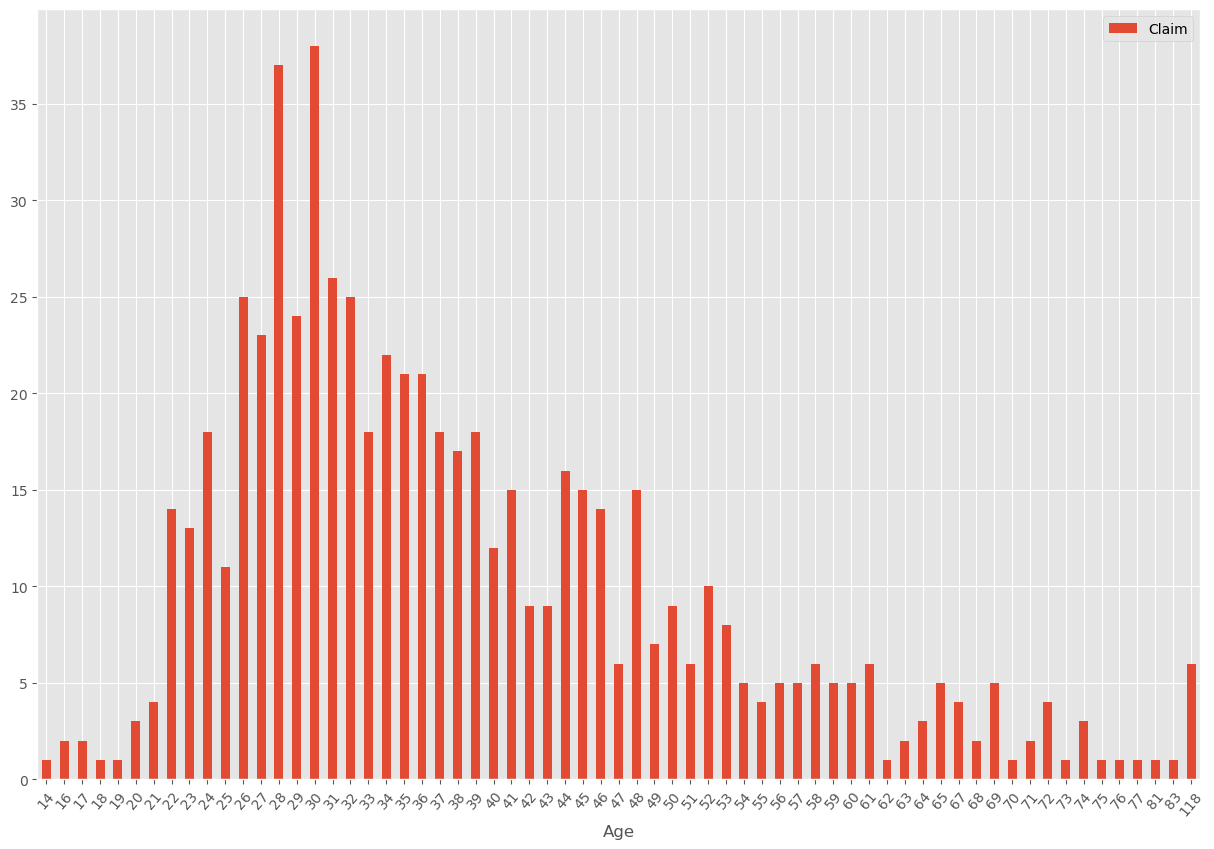

In [19]:
age_s = exp[exp['Claim']==0].groupby('Age').agg({'Claim':'count'})
age_s.plot(kind = 'bar',figsize=(15,10),rot = 50);

# Preparing data for the ML mode

In [20]:
num_zeros = (y==0).sum()
num_ones = (y == 1).sum()

In [21]:
num_zeros

927

In [22]:
num_ones

62399

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score,KFold
from sklearn.neighbors import NearestNeighbors, KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

from sklearn.preprocessing import StandardScaler

# Making data numeric

In [24]:
df['Agency_Type'] = df['Agency_Type'].replace({'Travel Agency':0,'Airlines':1})
df['Gender'] = df['Gender'].replace({'F':0,'M':1})
df['Distribution_Channel'] = df['Distribution_Channel'].replace({'Offline':0,'Online':1})
df = pd.get_dummies(df,columns=['Continents'])
df = df.drop(columns =['Agency','Product_Name','Destination'])

# Splitting the data + normalizing the imbalance

In [25]:
X = df.drop('Claim',axis = 1)
y = df['Claim']

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=42)

In [27]:
from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler(sampling_strategy=1)
X_train_rus,y_train_rus = rus.fit_resample(X_train,y_train)

In [28]:
from imblearn.over_sampling import SMOTE
oversample = SMOTE()

oversample = SMOTE()

X,y = oversample.fit_resample(X,y)

In [29]:
num_zeros = (y==0).sum()
num_ones = (y == 1).sum()

# Random Forest

In [30]:
from sklearn.ensemble import RandomForestClassifier

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=42)

rf_results=[]

rf = RandomForestClassifier(n_estimators = 100)
rf.fit(X_train,y_train)
rf_results.append(np.mean(cross_val_score(rf,X_test,y_test,cv=5)))

In [31]:
model_rf = rf.predict(X_test)
model_cms = confusion_matrix(y_test,model_rf)
model_cms

array([[4784,  203],
       [ 492, 4544]], dtype=int64)

In [32]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, model_rf, labels=rf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=rf.classes_)

# Checking the most important features

In [33]:
from sklearn.feature_selection import RFE

selector = RFE(rf,n_features_to_select = 5,step = 1)
selector = selector.fit(X,y)
selector.support_
X_columns = X
print('The most important features',X_columns.columns[selector.support_])

The most important features Index(['Duration', 'Net Sales', 'Commision', 'Gender', 'Age'], dtype='object')


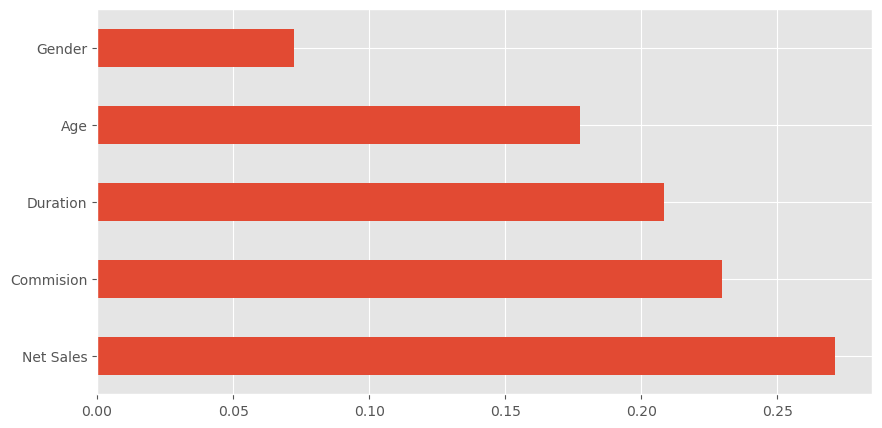

In [34]:
feat_importances = pd.Series(rf.feature_importances_,index = X.columns)
feat_importances.nlargest(5).plot(kind = 'barh',figsize=(10,5))
plt.show()

# Correlation

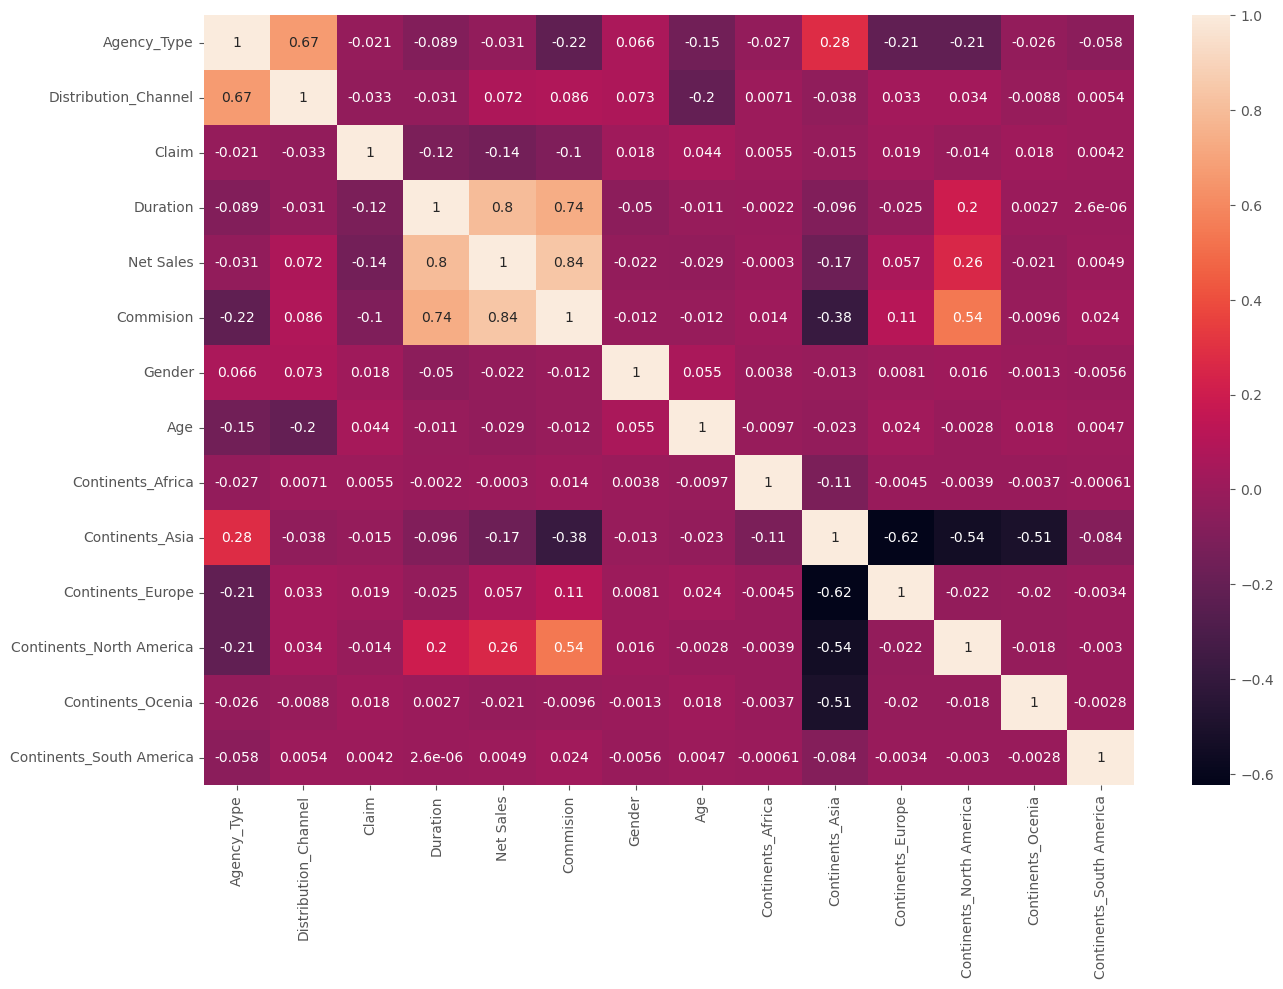

In [35]:
plt.figure(figsize=(15,10))
sns.heatmap(data =  df.corr(),annot = True);

# Random Forest confusion matrix

In [36]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, model_rf, labels=rf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=rf.classes_)

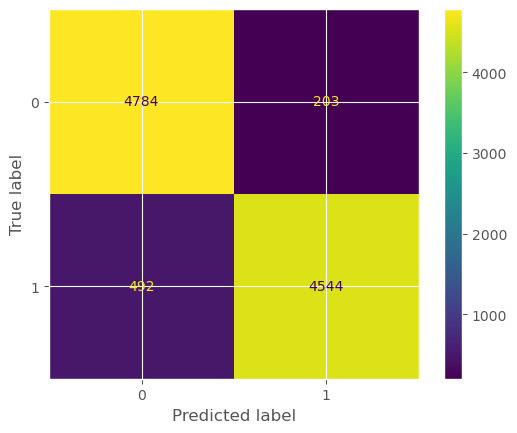

In [37]:
ConfusionMatrixDisplay.from_estimator(rf, X_test, y_test)
plt.show()

# Logistic Regression

In [38]:
scaler = StandardScaler()

np.random.seed(42)

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

log_reg = LogisticRegression()
log_reg.fit(X_train_scaled,y_train)
log_reg.predict(X_test_scaled)
log_reg.score(X_test_scaled,y_test)

0.712561109448269

In [39]:
log_pred = log_reg.predict(X_test_scaled)
logistic_ = log_reg.predict(X_test)
logistic_cm = confusion_matrix(y_test,log_pred)
logistic_cm

array([[3811, 1176],
       [1705, 3331]], dtype=int64)

# KNN

In [40]:
np.random.seed(42)
k_range = range(1,15)
score = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train_scaled,y_train)
    y_pred = knn.predict(X_test_scaled)
    score.append(metrics.accuracy_score(y_test,y_pred))
score

[0.8789783497954704,
 0.8513419135987229,
 0.8616182779606905,
 0.8357777112640926,
 0.8435598124314078,
 0.8293923974857828,
 0.8360770228474509,
 0.823206624763045,
 0.8269979048189164,
 0.8147261299012272,
 0.8197146562905318,
 0.809138980345206,
 0.8114337024842861,
 0.8033522897336127]

# Plotting the model performance

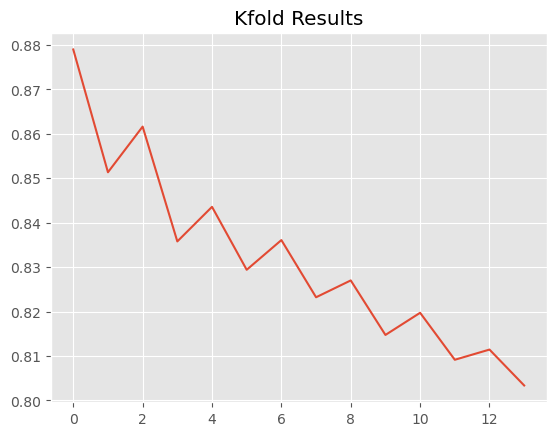

In [41]:
plt.plot(score);
plt.title('Kfold Results');

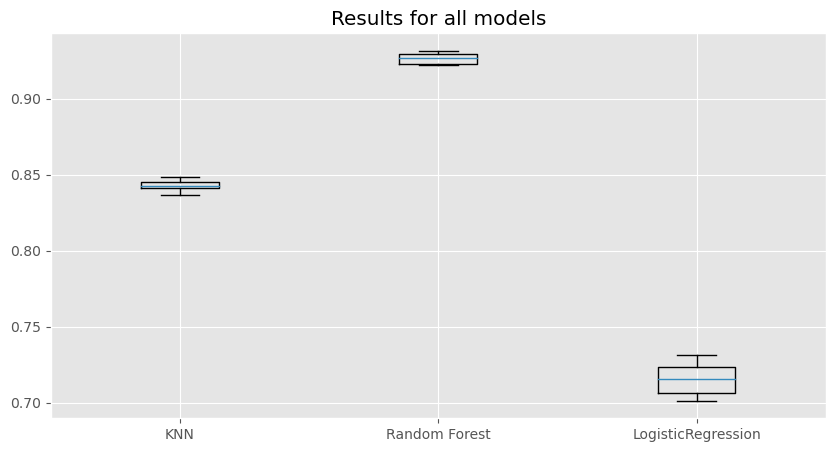

In [42]:
plt.figure(figsize=(10,5))
plt.title('Results for all models')
models = {"KNN": KNeighborsClassifier(), "Random Forest": RandomForestClassifier(n_estimators = 100),"LogisticRegression": LogisticRegression()}

outcome = []

for model in models.values():
    kf = KFold(n_splits=6,random_state = 42,shuffle = True)
    cv_result = cross_val_score(model,X_train_scaled,y_train,cv=kf)
    outcome.append(cv_result)
plt.boxplot(outcome,labels = models.keys())
plt.show()

# THE END 